In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1 6.283185307179586


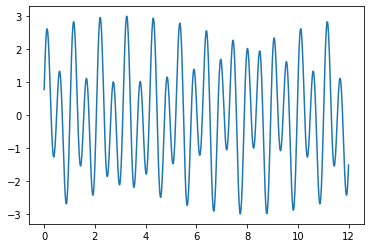

In [49]:
df = pd.DataFrame()
df['x'] = np.linspace(0, 12, 1000)
freq = 1 # times per second
w = 2*np.pi*freq
df['y'] = np.sin(df['x']*w) + 2*np.sin(df['x']*w*1.9 + 0.4)
# for i in range(df['x'].size):
#     df['y'][i] = 2 * (i % 2) - 1
# display(df)
plt.plot(df['x'], df['y'])
print(freq, w)

,x,y,dft,ndft,f
0,0.000000,0.778837,3.338411+0.000000j,0.006677,0.000000
1,0.012012,1.109501,3.343096+0.556336j,0.006778,0.083250
2,0.024024,1.418507,3.357275+1.116508j,0.007076,0.166500
3,0.036036,1.700624,3.381336+1.684112j,0.007555,0.249750
4,0.048048,1.951161,3.415961+2.262116j,0.008194,0.333000
...,...,...,...,...,...
995,11.951952,-2.277605,3.462203-2.852071j,0.008971,82.833667
996,11.963964,-2.144399,3.415961-2.262116j,0.008194,82.916917
997,11.975976,-1.970502,3.381336-1.684112j,0.007555,83.000167
998,11.987988,-1.758384,3.357275-1.116508j,0.007076,83.083417


23 22 1.9147480814147484


,x,y,dft,ndft,f
21,0.252252,0.466807,15.9724820+88.2092100j,0.179287,1.748248
22,0.264264,0.192888,33.450292+198.973354j,0.403531,1.831498
23,0.276276,-0.070216,-146.488188-940.422701j,1.903527,1.914748
24,0.288288,-0.317246,-20.733166-143.964416j,0.290899,1.997998
25,0.300300,-0.543355,-10.5088690-79.1192820j,0.159628,2.081248


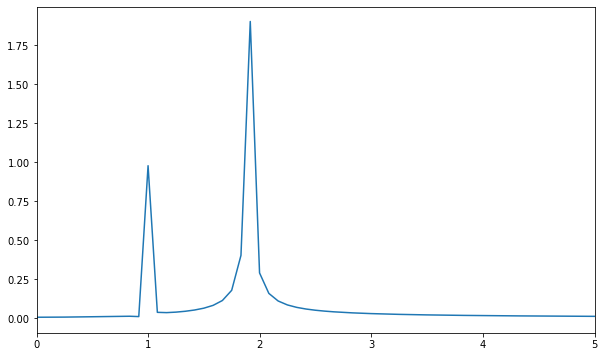

In [50]:
def dft_i(xs, k):
    N = len(xs)
    freq = k * 2*np.pi/N
    res = 0
    for n, x in enumerate(xs):
        a = np.cos(freq*n)
        b = np.sin(freq*n)
        res += x * (a - 1j*b)
    return res

dft = [dft_i(df['y'], i) for i in range(df['y'].size)]
dft = np.array(dft)
df['dft'] = dft

df['ndft'] = np.abs(dft / df['x'].size * 2)

fa = (len(df['x']) - 2) / df['x'].max()
df['f'] = np.linspace(0, fa, len(df['x']))

display(df)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['f'], np.abs(df['ndft']))
# ax.plot(df['f'], np.real(df['dft']))
ax.set_xlim(0, 5) #fa / 2)

m = np.abs(df['dft'][:df['dft'].size // 2 -1]).argmax()
m2 = (df['dft'][:df['dft'].size // 2 -1]).argmax()
print(m, m2, df['f'].iat[m])
display(df.iloc[m-2:].head(5))

In [4]:
N = df['y'].size
dft_mat = np.outer(np.arange(N), np.arange(N)*2*np.pi/N)
df['dft_mat'] = (np.cos(dft_mat) - 1j * np.sin(dft_mat)) @ df['y']
df

,x,y,dft,f,dft_mat
0,0.000000,0.778837,3.338411+0.000000j,0.000000,3.338411+0.000000j
1,0.012012,1.109501,3.343096+0.556336j,0.083250,3.343096+0.556336j
2,0.024024,1.418507,3.357275+1.116508j,0.166500,3.357275+1.116508j
3,0.036036,1.700624,3.381336+1.684112j,0.249750,3.381336+1.684112j
4,0.048048,1.951161,3.415961+2.262116j,0.333000,3.415961+2.262116j
...,...,...,...,...,...
995,11.951952,-2.277605,3.462203-2.852071j,82.833667,3.462203-2.852071j
996,11.963964,-2.144399,3.415961-2.262116j,82.916917,3.415961-2.262116j
997,11.975976,-1.970502,3.381336-1.684112j,83.000167,3.381336-1.684112j
998,11.987988,-1.758384,3.357275-1.116508j,83.083417,3.357275-1.116508j


,x,y,dft,f,dft_mat,np.fft.fft,np.fft.fftfreq,np.fft.fftshift,ifft
0,0.000000,0.778837,3.338411+0.000000j,0.000000,3.338411+0.000000j,3.338411+0.000000j,0.00000,0.994111+0.000000j,0.778837-0.000000j
1,0.012012,1.109501,3.343096+0.556336j,0.083250,3.343096+0.556336j,3.343096+0.556336j,0.08325,0.994111+0.003177j,1.109501-0.000000j
2,0.024024,1.418507,3.357275+1.116508j,0.166500,3.357275+1.116508j,3.357275+1.116508j,0.16650,0.994111+0.006354j,1.418507+0.000000j
3,0.036036,1.700624,3.381336+1.684112j,0.249750,3.381336+1.684112j,3.381336+1.684112j,0.24975,0.994110+0.009532j,1.700624+0.000000j
4,0.048048,1.951161,3.415961+2.262116j,0.333000,3.415961+2.262116j,3.415961+2.262116j,0.33300,0.994109+0.012709j,1.951161-0.000000j
...,...,...,...,...,...,...,...,...,...
995,11.951952,-2.277605,3.462203-2.852071j,82.833667,3.462203-2.852071j,3.462203-2.852071j,-0.41625,0.994108-0.015887j,-2.277605-0.000000j
996,11.963964,-2.144399,3.415961-2.262116j,82.916917,3.415961-2.262116j,3.415961-2.262116j,-0.33300,0.994109-0.012709j,-2.144399-0.000000j
997,11.975976,-1.970502,3.381336-1.684112j,83.000167,3.381336-1.684112j,3.381336-1.684112j,-0.24975,0.994110-0.009532j,-1.970502+0.000000j
998,11.987988,-1.758384,3.357275-1.116508j,83.083417,3.357275-1.116508j,3.357275-1.116508j,-0.16650,0.994111-0.006354j,-1.758384-0.000000j


22
23


,x,y,dft,f,dft_mat,np.fft.fft,np.fft.fftfreq,np.fft.fftshift,ifft
20,0.240240,0.745977,10.8857080+55.9262390j,1.664998,10.8857080+55.9262390j,10.8857080+55.9262390j,1.66500,0.994064+0.063629j,0.745977+0.000000j
21,0.252252,0.466807,15.9724820+88.2092100j,1.748248,15.9724820+88.2092100j,15.9724820+88.2092100j,1.74825,0.994059+0.066820j,0.466807+0.000000j
22,0.264264,0.192888,33.450292+198.973354j,1.831498,33.450292+198.973354j,33.450292+198.973354j,1.83150,0.994054+0.070012j,0.192888+0.000000j
23,0.276276,-0.070216,-146.488188-940.422701j,1.914748,-146.488188-940.422701j,-146.488188-940.422701j,1.91475,0.994049+0.073205j,-0.070216+0.000000j
24,0.288288,-0.317246,-20.733166-143.964416j,1.997998,-20.733166-143.964416j,-20.733166-143.964416j,1.99800,0.994043+0.076400j,-0.317246-0.000000j


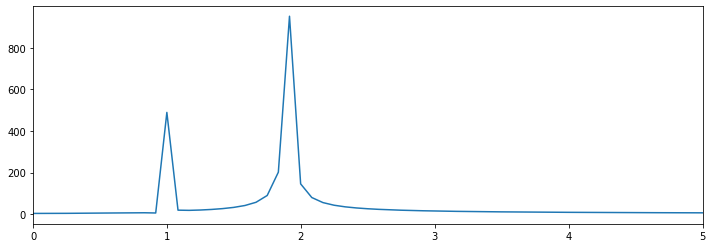

In [21]:
df['np.fft.fft'] = np.fft.fft(df['y'].values)
display(df)
df['np.fft.fftfreq'] = np.fft.fftfreq(len(df['y']), df['x'][1])
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df['np.fft.fftfreq'][:df['x'].size//2], np.abs(df['np.fft.fft'][:df['x'].size//2]))
ax.set_xlim(0, 5)# df['x'].mean())
print(df['np.fft.fft'][:df['x'].size//2].argmax())
print(np.abs(df['np.fft.fft'][:df['x'].size//2]).argmax())
df.iloc[df['np.fft.fft'][:df['x'].size//2].argmax() -2:].head(5)

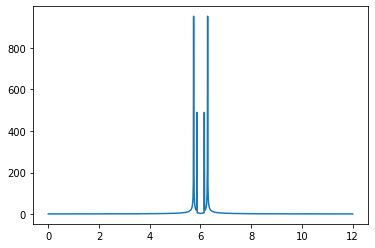

In [6]:

df['np.fft.fftshift'] = np.fft.fftshift(df['dft'])
plt.plot(df['x'], np.abs(df['np.fft.fftshift']))

,x,y,dft,f,dft_mat,np.fft.fft,np.fft.fftfreq,np.fft.fftshift,ifft
0,0.000000,0.778837,3.338411+0.000000j,0.000000,3.338411+0.000000j,3.338411+0.000000j,0.00000,0.994111+0.000000j,0.778837-0.000000j
1,0.012012,1.109501,3.343096+0.556336j,0.083250,3.343096+0.556336j,3.343096+0.556336j,0.08325,0.994111+0.003177j,1.109501-0.000000j
2,0.024024,1.418507,3.357275+1.116508j,0.166500,3.357275+1.116508j,3.357275+1.116508j,0.16650,0.994111+0.006354j,1.418507+0.000000j
3,0.036036,1.700624,3.381336+1.684112j,0.249750,3.381336+1.684112j,3.381336+1.684112j,0.24975,0.994110+0.009532j,1.700624+0.000000j
4,0.048048,1.951161,3.415961+2.262116j,0.333000,3.415961+2.262116j,3.415961+2.262116j,0.33300,0.994109+0.012709j,1.951161-0.000000j
...,...,...,...,...,...,...,...,...,...
995,11.951952,-2.277605,3.462203-2.852071j,82.833667,3.462203-2.852071j,3.462203-2.852071j,-0.41625,0.994108-0.015887j,-2.277605-0.000000j
996,11.963964,-2.144399,3.415961-2.262116j,82.916917,3.415961-2.262116j,3.415961-2.262116j,-0.33300,0.994109-0.012709j,-2.144399-0.000000j
997,11.975976,-1.970502,3.381336-1.684112j,83.000167,3.381336-1.684112j,3.381336-1.684112j,-0.24975,0.994110-0.009532j,-1.970502+0.000000j
998,11.987988,-1.758384,3.357275-1.116508j,83.083417,3.357275-1.116508j,3.357275-1.116508j,-0.16650,0.994111-0.006354j,-1.758384-0.000000j


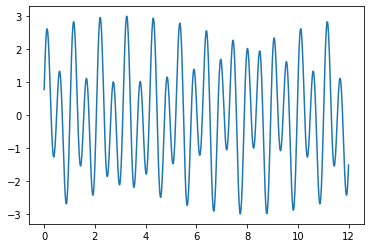

In [7]:
ifft = np.fft.ifft(df['dft'])
df['ifft'] = ifft
display(df)
plt.plot(df['x'], np.real(df['ifft']))

# Audio

In [8]:
import pydub

In [9]:
def get_samples(filepath, start_eng_sec, offset_sec, dur_sec):
    audio = pydub.AudioSegment.from_file(filepath)
    samples = audio.get_array_of_samples()
    start_sec = start_eng_sec + offset_sec
    s1 = samples[int(np.round(start_sec * audio.frame_rate)):int(np.round((start_sec + dur_sec) * audio.frame_rate))]
#     fig, ax = plt.subplots(figsize=(12, 2))
#     ax.plot(s1)
#     n / len(samples)

#     (len(samples) / audio.frame_rate) / 60

    aud1 = pydub.AudioSegment(s1, frame_rate=audio.frame_rate, sample_width=2, channels=1)
    aud1
    return s1, aud1

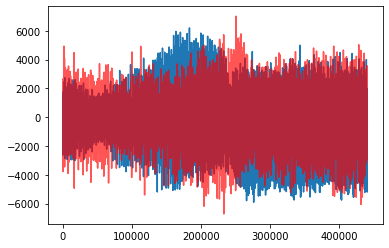

In [10]:
dur_sec = 10
offset_sec = 4
# filepath1 = '/home/tot/Downloads/Subaru 1 ideal.m4a'
# st = 8.6
filepath1 = '/home/tot/Downloads/Subaru 4.m4a'
st = 5.2
s1, aud1 = get_samples(filepath1, start_eng_sec=st+0.6, offset_sec=offset_sec, dur_sec=dur_sec)

filepath2 = '/home/tot/Downloads/Subaru noises.m4a'
s2, aud2 = get_samples(filepath2, start_eng_sec=9.7+0.6, offset_sec=offset_sec, dur_sec=dur_sec)

display(aud1, aud2)
plt.plot(s1)
plt.plot(s2, c='#f00a')

(0.0, 1000.0)

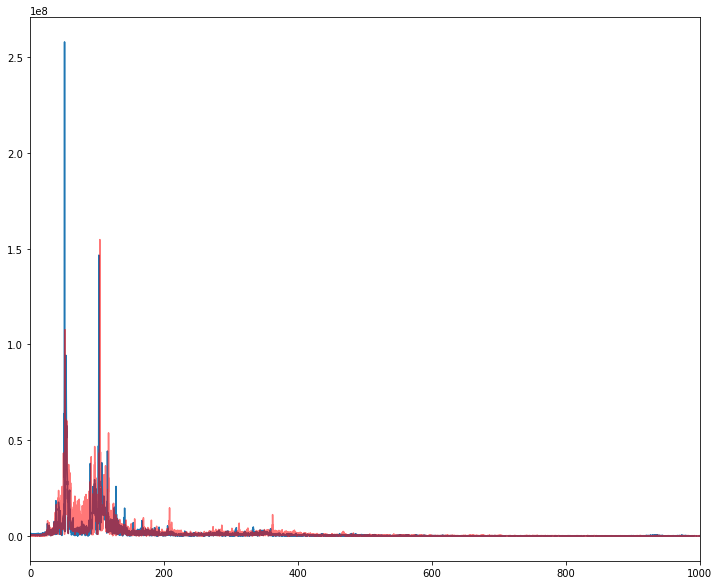

In [11]:
fft1 = np.fft.fft(s1)
fft2 = np.fft.fft(s2)

fa = (len(s1) - 1) / dur_sec
f = np.linspace(0, fa, len(s1))

max_freq = int(0.05 * aud1.frame_rate)
fig, ax1 = plt.subplots(figsize=(12, 10))
ax1.plot(f, np.abs(fft1))
ax1.plot(f, np.abs(fft2), c='#f008')
ax1.set_xlim(0, 1000)

(0.0, 500.0)

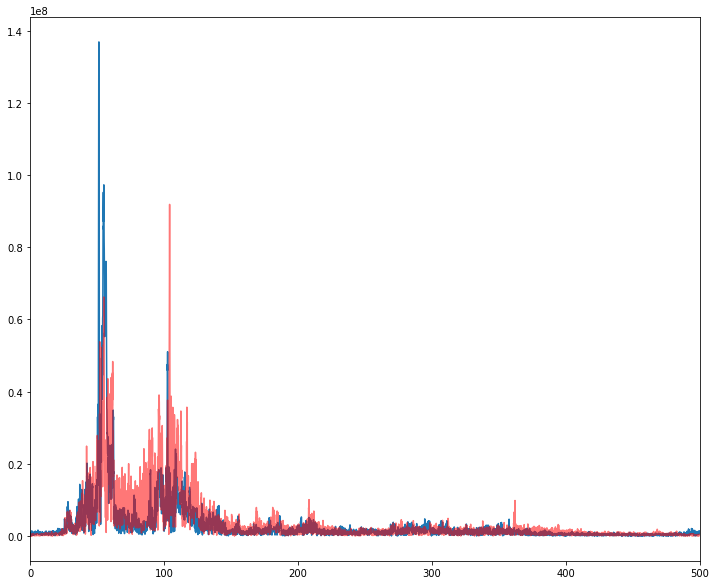

In [12]:
dur_sec = 10
offset_sec = 2
filepath1 = '/home/tot/Downloads/Subaru 1 ideal.m4a'
s1, aud1 = get_samples(filepath1, start_eng_sec=8.6+0.6, offset_sec=offset_sec, dur_sec=dur_sec)
filepath2 = '/home/tot/Downloads/Subaru noises.m4a'
s2, aud2 = get_samples(filepath2, start_eng_sec=9.7+0.6, offset_sec=offset_sec, dur_sec=dur_sec)

fft1 = np.fft.fft(s1)
fft2 = np.fft.fft(s2)
fa = (len(s1) - 1) / dur_sec
f = np.linspace(0, fa, len(s1))
max_freq = int(0.05 * aud1.frame_rate)
fig, ax1 = plt.subplots(figsize=(12, 10))
ax1.plot(f, np.abs(fft1))
ax1.plot(f, np.abs(fft2), c='#f008')
ax1.set_xlim(0, 500)